1. See if chapter titles can be extracted. 
2. If they can, extract chapter sentences
3. Then find the sentiment of each (decide which analyzer to use, maybe compare them?)

In [89]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk     
from nltk.tokenize import sent_tokenize
from nltk import tokenize
from afinn import Afinn 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from afinn import Afinn
from textblob import TextBlob
from statistics import mean
import numpy as np

In [90]:
file = open("Book1.txt", mode="r")     # open a file in read mode.
book1 = file.readlines()                             # read the txt file with lines splitted.
file.close()                                        # close the file.
book1[0:10]

book1_text = ''

# Turn the book into one lone string
for line in book1:
    if not bool(re.search('Page | d+', line)):
        if not bool(re.search('Harry Potter and the Philosophers Stone - J.K. Rowling', line)):
            book1_text += line
        
# Find all the titles using regular expression
titles = re.findall('\n{5,10}[\-A-Z ]+\n[\-A-Z ]+\n|\n{5,10}[\-A-Z ]+\n', book1_text)

# Find all chapter text by finding values in between the titles
chapters_text = re.split('\n{5,10}[\-A-Z ]+\n[\-A-Z ]+\n|\n{5,10}[\-A-Z ]+\n', book1_text)
#Remove the value in the list that was before the first chapter
chapters_text = chapters_text[1:]

# Create a data frame from the titles and chapter
df1 = pd.DataFrame(list(zip(titles, chapters_text)), columns = ['Chapter', 'Text'])

# Remove all of the newlines
df1["Book"] = "Book 1: Harry Potter and the Philosophers Stone"
df1["Chapter"] = [re.sub("\n", '' ,s) for s in df1["Chapter"]] 
df1["Text"] = [re.sub("\n", ' ' ,s) for s in df1["Text"]] 

df1

,Chapter,Text,Book
0,THE BOY WHO LIVED,"Mr. and Mrs. Dursley, of number four, Privet ...",Book 1: Harry Potter and the Philosophers Stone
1,THE VANASHIG GLASS,Nearly ten years had passed since the Dursley...,Book 1: Harry Potter and the Philosophers Stone
2,THE LETTERS FROM NO ONE,The escape of the Brazilian boa constrictor e...,Book 1: Harry Potter and the Philosophers Stone
3,THE KEEPER OF THE KEYS,BOOM. They knocked again. Dudley jerked awake...,Book 1: Harry Potter and the Philosophers Stone
4,DIAGON ALLY,Harry woke early the next morning. Although h...,Book 1: Harry Potter and the Philosophers Stone
5,THE JOURNEY FROM PLATFORM NINE AND THREE-QUART...,Harry’s last month with the Dursleys wasn’t f...,Book 1: Harry Potter and the Philosophers Stone
6,THE SORTING HAT,witch in emerald-green robes stood there. She...,Book 1: Harry Potter and the Philosophers Stone
7,THE POTIONS MASTER,"“There, look.” “Where?” “Next to the tall...",Book 1: Harry Potter and the Philosophers Stone
8,THE MIDNIGHT DUEL,Harry had never believed he would meet a boy ...,Book 1: Harry Potter and the Philosophers Stone
9,HALLOWEEN,Malfoy couldn’t believe his eyes when he saw ...,Book 1: Harry Potter and the Philosophers Stone


In [91]:
file2 = open("Book2.txt", mode="r")     # open a file in read mode.
book2 = file2.readlines()                             # read the txt file with lines splitted.
file2.close()                                        # close the file.
book2[0:10]

book2_text = ''

# Turn the book into one lone string
for line in book2:
    if not bool(re.search('Page | d+', line)):
        if not bool(re.search('Harry Potter and the Philosophers Stone - J.K. Rowling', line)):
            book2_text += line
        
# Find all the titles using regular expression
titles2 = re.findall('\n{5,10}[\-\’A-Z ]+\n[\-\’A-Z ]+\n|\n{5,10}[\-\’A-Z ]+\n', book2_text)

# Find all chapter text by finding values in between the titles
chapters_text2 = re.split('\n{5,10}[\-\’A-Z ]+\n[\-\’A-Z ]+\n|\n{5,10}[\-\’A-Z ]+\n', book2_text)
#Remove the value in the list that was before the first chapter
chapters_text2 = chapters_text2[1:]

# Create a data frame from the titles and chapter
df2 = pd.DataFrame(list(zip(titles2, chapters_text2)), columns = ['Chapter', 'Text'])

# Remove all of the newlines
df2["Book"] = "Book 2: Harry Potter and the Chamber of Secrets"
df2["Chapter"] = [re.sub("\n", '' ,s) for s in df2["Chapter"]] 
df2["Text"] = [re.sub("\n", ' ' ,s) for s in df2["Text"]] 

df2

,Chapter,Text,Book
0,THE WORST BIRTHDAY,"Not for the first time, an argument had broke...",Book 2: Harry Potter and the Chamber of Secrets
1,DOBBY’S WARNING,"Harry managed not to shout out, but it was a ...",Book 2: Harry Potter and the Chamber of Secrets
2,THE BURROW,"“Ron\” breathed Harry, creeping to the window...",Book 2: Harry Potter and the Chamber of Secrets
3,AT FLOURISH AND BLOTTS,life on Privet Drive. The Dursleys liked ever...,Book 2: Harry Potter and the Chamber of Secrets
4,THE WHOMPING WILLOW,The end of the summer vacation came too quick...,Book 2: Harry Potter and the Chamber of Secrets
5,GILDEROY LOCKHART,Great Hall. The four long House tables were l...,Book 2: Harry Potter and the Chamber of Secrets
6,MUDBLOODS AND MURMURS,dodging out of sight whenever he saw Gilderoy...,Book 2: Harry Potter and the Chamber of Secrets
7,THE DEATHDAY PARTY,"grounds and into the castle. Madam Pomfrey, t...",Book 2: Harry Potter and the Chamber of Secrets
8,THE WRITING ON THE WALL,“What’s going on here? What’s going on?” ca...,Book 2: Harry Potter and the Chamber of Secrets
9,THE ROGUE BLUDGER,Lockhart had not brought live creatures to cl...,Book 2: Harry Potter and the Chamber of Secrets


In [92]:
file3 = open("Book3.txt", mode="r")     # open a file in read mode.
book3 = file3.readlines()                             # read the txt file with lines splitted.
file3.close()                                        # close the file.
book3[0:10]

book3_text = ''

# Turn the book into one lone string
for line in book3:
    if not bool(re.search('Page | d+', line)):
        if not bool(re.search('Harry Potter and the Philosophers Stone - J.K. Rowling', line)):
            book3_text += line
        
# Find all the titles using regular expression
titles3 = re.findall('\n{5,10}[A-Z\’\,\- ]+\n[A-Z\’\,\- ]+\n|\n{5,10}[A-Z\’\,\- ]+\n', book3_text)

# Find all chapter text by finding values in between the titles
chapters_text3 = re.split('\n{5,10}[A-Z\’\,\- ]+\n[A-Z\’\,\- ]+\n|\n{5,10}[A-Z\’\,\- ]+\n', book3_text)
#Remove the value in the list that was before the first chapter
chapters_text3 = chapters_text3[1:]

# Create a data frame from the titles and chapter
df3 = pd.DataFrame(list(zip(titles3, chapters_text3)), columns = ['Chapter', 'Text'])

# Remove all of the newlines
df3["Book"] = "Book 3: Harry Potter and the Prisoner of Azkaban"
df3["Chapter"] = [re.sub("\n", '' ,s) for s in df3["Chapter"]] 
df3["Text"] = [re.sub("\n", ' ' ,s) for s in df3["Text"]] 

df3

,Chapter,Text,Book
0,OWL POST,Harry Potter was a highly unusual boy in many...,Book 3: Harry Potter and the Prisoner of Azkaban
1,AUNT MARGE’S BIG MISTAKE,find the three Dursleys already sitting aroun...,Book 3: Harry Potter and the Prisoner of Azkaban
2,THE KNIGHT BUS,Harry was several streets away before he coll...,Book 3: Harry Potter and the Prisoner of Azkaban
3,THE LEAKY CAULDRON,new freedom. Never before had he been able to...,Book 3: Harry Potter and the Prisoner of Azkaban
4,THE DEMENTOR,Tom woke Harry the next morning with his usua...,Book 3: Harry Potter and the Prisoner of Azkaban
5,TALONS AND TEA LEAVES,"When Harry, Ron, and Hermione entered the Gre...",Book 3: Harry Potter and the Prisoner of Azkaban
6,THE BOGGART IN THE WARDROBE,"Thursday morning, when the Slytherins and ba...",Book 3: Harry Potter and the Prisoner of Azkaban
7,FLIGHT OF THE FAT LADY,"In no time at all, Defense Against the Dark A...",Book 3: Harry Potter and the Prisoner of Azkaban
8,GRIM DEFEAT,Professor Dumbledore sent all the Gryffindors...,Book 3: Harry Potter and the Prisoner of Azkaban
9,THE MARAUDER’S MAP,Madam Pomfrey insisted on keeping Harry in th...,Book 3: Harry Potter and the Prisoner of Azkaban


In [93]:
file4 = open("Book4.txt", mode="r")     # open a file in read mode.
book4 = file4.readlines()                             # read the txt file with lines splitted.
file4.close()                                        # close the file.
book4[0:10]

book4_text = ''

# Turn the book into one lone string
for line in book4:
    if not bool(re.search('Page | d+', line)):
        if not bool(re.search('Harry Potter and the Philosophers Stone - J.K. Rowling', line)):
            book4_text += line
        
# Find all the titles using regular expression
titles4 = re.findall('\n{5,10}[A-Z\’\,\-\. ]+\n[A-Z\’\,\-\. ]+\n|\n{5,10}[A-Z\’\,\-\. ]+\n', book4_text)

# Find all chapter text by finding values in between the titles
chapters_text4 = re.split('\n{5,10}[A-Z\’\,\-\. ]+\n[A-Z\’\,\-\. ]+\n|\n{5,10}[A-Z\’\,\-\. ]+\n', book4_text)
#Remove the value in the list that was before the first chapter
chapters_text4 = chapters_text4[1:]

# Create a data frame from the titles and chapter
df4 = pd.DataFrame(list(zip(titles4, chapters_text4)), columns = ['Chapter', 'Text'])

# Remove all of the newlines
df4["Book"] = "Book 4: Harry Potter and the Goblet of Fire"
df4["Chapter"] = [re.sub("\n", '' ,s) for s in df4["Chapter"]] 
df4["Text"] = [re.sub("\n", ' ' ,s) for s in df4["Text"]] 

df4

,Chapter,Text,Book
0,THE RIDDLE HOUSE,The villagers of Little Hangleton still calle...,Book 4: Harry Potter and the Goblet of Fire
1,THE SCAR,"Harry lay flat on his back, breathing hard as...",Book 4: Harry Potter and the Goblet of Fire
2,THE INVITATION,"By the time Harry arrived in the kitchen, the...",Book 4: Harry Potter and the Goblet of Fire
3,BACK TO THE BURROW,was packed with his school things and all his...,Book 4: Harry Potter and the Goblet of Fire
4,WEASLEYS’ WIZARD WHEEZES,"Harry spun faster and faster, elbows tucked t...",Book 4: Harry Potter and the Goblet of Fire
5,THE PORTKEY,in Ron’s room when he was being shaken awake ...,Book 4: Harry Potter and the Goblet of Fire
6,BAGMAN AND CROUCH,feet. They had arrived on what appeared to be...,Book 4: Harry Potter and the Goblet of Fire
7,THE QUIDDITCH WORLD CUP,"Clutching their purchases, Mr. Weasley in t...",Book 4: Harry Potter and the Goblet of Fire
8,THE DARK MARK,“ Don’t tell your mother you’ve been gambling...,Book 4: Harry Potter and the Goblet of Fire
9,MAYHEM AT THE MINISTRY,Mr. Weasley woke them after only a few hours ...,Book 4: Harry Potter and the Goblet of Fire


In [94]:
file5 = open("Book5.txt", mode="r")     # open a file in read mode.
book5 = file5.readlines()                             # read the txt file with lines splitted.
file5.close()                                        # close the file.
book5[0:10]

book5_text = ''

# Turn the book into one lone string
for line in book5:
    if not bool(re.search('Page | d+', line)):
        if not bool(re.search('Harry Potter and the Philosophers Stone - J.K. Rowling', line)):
            book5_text += line
        
# Find all the titles using regular expression
book5_text = book5_text[21:]
book5_text = book5_text.replace("COULD HAVE DONE HER A SERIOUS INJURY", "could have done her a serious injury")
book5_text = book5_text.replace("XX", "xx")
titles5 = re.findall('\n{5,10}[A-Z\’\, ]+\n[A-Z\’\, ]+\n|\n{5,10}[A-Z\’\, ]+\n', book5_text)

# Find all chapter text by finding values in between the titles
chapters_text5 = re.split('\n{5,10}[A-Z\’\, ]+\n[A-Z\’\, ]+\n|\n{5,10}[A-Z\’\, ]+\n', book5_text)
#Remove the value in the list that was before the first chapter
chapters_text5 = chapters_text5[1:]

# Create a data frame from the titles and chapter
df5 = pd.DataFrame(list(zip(titles5, chapters_text5)), columns = ['Chapter', 'Text'])

# Remove all of the newlines
df5["Book"] = "Book 5: Harry Potter and the Order of the Phoenix"
df5["Chapter"] = [re.sub("\n", '' ,s) for s in df5["Chapter"]] 
df5["Text"] = [re.sub("\n", ' ' ,s) for s in df5["Text"]] 

df5

,Chapter,Text,Book
0,DUDLEY DEMENTED,houses of Privet Drive. Cars that were usuall...,Book 5: Harry Potter and the Order of the Phoenix
1,A PECK OF OWLS,“What?” said Harry blankly. “He left!” said...,Book 5: Harry Potter and the Order of the Phoenix
2,IMPROPER USE OF MAGIC OFFICE,Ministry of Magic Harry read this letter ...,Book 5: Harry Potter and the Order of the Phoenix
3,THE ADVANCED GUARD,expelled from Hogwarts. I want to know what’s...,Book 5: Harry Potter and the Order of the Phoenix
4,"NUMBER TWELVE, GRIMMAULD PLACE",“What’s the Order of the — ?” Harry began. ...,Book 5: Harry Potter and the Order of the Phoenix
5,THE ORDER OF THE PHOENIX,“Your — ?” put a Permanent Sticking Charm o...,Book 5: Harry Potter and the Order of the Phoenix
6,THE NOBLE AND MOST ANCIENT HOUSE OF BLACK,Mrs. Weasley followed them upstairs looking g...,Book 5: Harry Potter and the Order of the Phoenix
7,THE MINISTRY OF MAGIC,Harry awoke at half-past five the next mornin...,Book 5: Harry Potter and the Order of the Phoenix
8,THE HEARING,Harry gasped; he could not help himself. The ...,Book 5: Harry Potter and the Order of the Phoenix
9,LUNA LOVEGOOD,Harry had a troubled night’s sleep. His paren...,Book 5: Harry Potter and the Order of the Phoenix


In [95]:
file6 = open("Book6.txt", mode="r")     # open a file in read mode.
book6 = file6.readlines()                             # read the txt file with lines splitted.
file6.close()                                        # close the file.
book6[0:10]

book6_text = ''

# Turn the book into one lone string
for line in book6:
    if not bool(re.search('Page | d+', line)):
        if not bool(re.search('Harry Potter and the Philosophers Stone - J.K. Rowling', line)):
            book6_text += line
        
# Find all the titles using regular expression
titles6 = re.findall('\n{5,10}[A-Z\’\,\- ]+\n[A-Z\’\,\- ]+\n|\n{5,10}[A-Z\’\,\- ]+\n', book6_text)

# Find all chapter text by finding values in between the titles
chapters_text6 = re.split('\n{5,10}[A-Z\’\,\- ]+\n[A-Z\’\,\- ]+\n|\n{5,10}[A-Z\’\,\- ]+\n', book6_text)
#Remove the value in the list that was before the first chapter
chapters_text6 = chapters_text6[1:]

# Create a data frame from the titles and chapter
df6 = pd.DataFrame(list(zip(titles6, chapters_text6)), columns = ['Chapter', 'Text'])

# Remove all of the newlines
df6["Book"] = "Book 6: Harry Potter and the Half Blood Prince"
df6["Chapter"] = [re.sub("\n", '' ,s) for s in df6["Chapter"]] 
df6["Text"] = [re.sub("\n", ' ' ,s) for s in df6["Text"]] 

df6

,Chapter,Text,Book
0,THE OTHER MINISTER,It was nearing midnight and the Prime Ministe...,Book 6: Harry Potter and the Half Blood Prince
1,SPINNER’S END,Many miles away the chilly mist that had pres...,Book 6: Harry Potter and the Half Blood Prince
2,WILL AND WON’T,Harry Potter was snoring loudly. He had been ...,Book 6: Harry Potter and the Half Blood Prince
3,HORACE SLUGHORN,Despite the fact that he had spent every waki...,Book 6: Harry Potter and the Half Blood Prince
4,AN EXCESS OF PHLEGM,"the Burrow, which was surrounded by the famil...",Book 6: Harry Potter and the Half Blood Prince
5,DRACO’S DETOUR,Harry remained within the confines of the Bur...,Book 6: Harry Potter and the Half Blood Prince
6,THE SLUG CLUB,Harry spent a lot of the last week of the hol...,Book 6: Harry Potter and the Half Blood Prince
7,SNAPE VICTORIOUS,Harry could not move a muscle. He lay there b...,Book 6: Harry Potter and the Half Blood Prince
8,THE HALF-BLOOD PRINCE,Harry and Ron met Hermione in the common room...,Book 6: Harry Potter and the Half Blood Prince
9,THE HOUSE OF GAUNT,For the rest of the week’s Potions lessons Ha...,Book 6: Harry Potter and the Half Blood Prince


In [96]:
file7 = open("Book7.txt", mode="r")     # open a file in read mode.
book7 = file7.readlines()                             # read the txt file with lines splitted.
file7.close()                                        # close the file.
book7[0:10]

book7_text = ''

# Turn the book into one lone string
for line in book7:
    if not bool(re.search('Page | d+', line)):
        if not bool(re.search('Harry Potter and the Philosophers Stone - J.K. Rowling', line)):
            book7_text += line
        
# Find all the titles using regular expression
book7_text = book7_text.replace("* ","\n")
book7_text = book7_text.replace("PICK YOUR OWN MISTLETOE", "pick your own mistletoe")
titles7 = re.findall('\n{5,10}[A-Z\’\,\- ]+\n[A-Z\’\,\- ]+\n|\n{5,10}[A-Z\’\,\- ]+\n', book7_text)

# Find all chapter text by finding values in between the titles
chapters_text7 = re.split('\n{5,10}[A-Z\’\,\- ]+\n[A-Z\’\,\- ]+\n|\n{5,10}[A-Z\’\,\- ]+\n', book7_text)

#Remove the value in the list that was before the first chapter
chapters_text7 = chapters_text7[1:]


# Create a data frame from the titles and chapter
df7 = pd.DataFrame(list(zip(titles7, chapters_text7)), columns = ['Chapter', 'Text'])

# Remove all of the newlines
df7["Book"] = "Book 7: Harry Potter and the Deathly Hallows"
df7["Chapter"] = [re.sub("\n", '' ,s) for s in df7["Chapter"]] 
df7["Text"] = [re.sub("\n", ' ' ,s) for s in df7["Text"]] 

df7

,Chapter,Text,Book
0,THE DARK LORD ASCENDING,"The two men appeared out of nowhere, a few ya...",Book 7: Harry Potter and the Deathly Hallows
1,IN MEMORIAM,Harry was bleeding. Clutching his right hand ...,Book 7: Harry Potter and the Deathly Hallows
2,THE DURSLEYS DEPARTING,"stairs and a voice yelled, “Oi! You!” Sixte...",Book 7: Harry Potter and the Deathly Hallows
3,THE SEVEN POTTERS,"Harry ran back upstairs to his bedroom, arriv...",Book 7: Harry Potter and the Deathly Hallows
4,FALLEN WARRIOR,“Hagrid?” metal and leather that surround...,Book 7: Harry Potter and the Deathly Hallows
5,THE GHOUL IN PAJAMAS,The shock of losing Mad-Eye hung over the hou...,Book 7: Harry Potter and the Deathly Hallows
6,THE WILL OF ALBUS DUMBLEDORE,He was walking along a mountain road in the c...,Book 7: Harry Potter and the Deathly Hallows
7,THE WEDDING,Three o’clock on the following afternoon fo...,Book 7: Harry Potter and the Deathly Hallows
8,A PLACE TO HIDE,"Everything seemed fuzzy, slow. Harry and Herm...",Book 7: Harry Potter and the Deathly Hallows
9,KREACHER’S TALE,"Harry woke early next morning, wrapped in a s...",Book 7: Harry Potter and the Deathly Hallows


In [97]:
df1["Chapter"].count()

17

In [98]:
dfall = df1.append([df2, df3, df4, df5, df6, df7],  ignore_index = True)
dfall["TextCharCount"] = dfall["Text"].str.len()
dfall["NumSentences"] = [len(sent_tokenize(s)) for s in dfall.Text]
dfall

/tmp/ipykernel_51/80193884.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfall = df1.append([df2, df3, df4, df5, df6, df7],  ignore_index = True)


,Chapter,Text,Book,TextCharCount,NumSentences
0,THE BOY WHO LIVED,"Mr. and Mrs. Dursley, of number four, Privet ...",Book 1: Harry Potter and the Philosophers Stone,21328,229
1,THE VANASHIG GLASS,Nearly ten years had passed since the Dursley...,Book 1: Harry Potter and the Philosophers Stone,16589,176
2,THE LETTERS FROM NO ONE,The escape of the Brazilian boa constrictor e...,Book 1: Harry Potter and the Philosophers Stone,17628,190
3,THE KEEPER OF THE KEYS,BOOM. They knocked again. Dudley jerked awake...,Book 1: Harry Potter and the Philosophers Stone,17013,207
4,DIAGON ALLY,Harry woke early the next morning. Although h...,Book 1: Harry Potter and the Philosophers Stone,32919,384
...,...,...,...,...,...
194,THE PRINCE’S TALE,"Harry remained kneeling at Snape’s side, simp...",Book 7: Harry Potter and the Deathly Hallows,39019,417
195,THE FOREST AGAIN,"Finally, the truth. Lying with his face press...",Book 7: Harry Potter and the Deathly Hallows,17733,204
196,KING’S CROSS,"He lay facedown, listening to the silence. He...",Book 7: Harry Potter and the Deathly Hallows,23318,287
197,THE FLAW IN THE PLAN,He was lying facedown on the ground again. Th...,Book 7: Harry Potter and the Deathly Hallows,34408,276


## Text Statistics

In [99]:
dfall["Book"].value_counts()

Book 5: Harry Potter and the Order of the Phoenix    38
Book 4: Harry Potter and the Goblet of Fire          37
Book 7: Harry Potter and the Deathly Hallows         37
Book 6: Harry Potter and the Half Blood Prince       30
Book 3: Harry Potter and the Prisoner of Azkaban     22
Book 2: Harry Potter and the Chamber of Secrets      18
Book 1: Harry Potter and the Philosophers Stone      17
Name: Book, dtype: int64

In [100]:
sentence_count = dfall.groupby('Book')['NumSentences'].mean().round()
sentence_count

Book
Book 1: Harry Potter and the Philosophers Stone      244.0
Book 2: Harry Potter and the Chamber of Secrets      248.0
Book 3: Harry Potter and the Prisoner of Azkaban     272.0
Book 4: Harry Potter and the Goblet of Fire          261.0
Book 5: Harry Potter and the Order of the Phoenix    281.0
Book 6: Harry Potter and the Half Blood Prince       251.0
Book 7: Harry Potter and the Deathly Hallows         245.0
Name: NumSentences, dtype: float64

In [101]:
dfsum = dfall.copy()
dfsum = dfsum.drop(['Chapter', 'Text', 'TextCharCount', 'NumSentences'], axis=1)
dfsum = dfsum.drop_duplicates()
dfsum.reset_index(inplace = True, drop = True)
dfsum["BookCharLen"] = [len(s) for s in dfall.groupby(['Book'])["Text"].sum()]
dfsum["ChapterTotal"] = [int(s) for s in dfall.groupby(['Book'])["Chapter"].count()]
dfsum["ChapAvgChar"] = ((dfsum['BookCharLen']) / (dfsum['ChapterTotal'])).round()

dfsum

,Book,BookCharLen,ChapterTotal,ChapAvgChar
0,Book 1: Harry Potter and the Philosophers Stone,371106,17,21830.0
1,Book 2: Harry Potter and the Chamber of Secrets,414485,18,23027.0
2,Book 3: Harry Potter and the Prisoner of Azkaban,529746,22,24079.0
3,Book 4: Harry Potter and the Goblet of Fire,961339,37,25982.0
4,Book 5: Harry Potter and the Order of the Phoenix,1246243,38,32796.0
5,Book 6: Harry Potter and the Half Blood Prince,825178,30,27506.0
6,Book 7: Harry Potter and the Deathly Hallows,956445,37,25850.0


## Creating DTMs

In [102]:
# Create stopwords list, include all names
characters = pd.read_csv("characters_list.csv",encoding="latin-1")
names = [name.split(" ") for name in characters.name]
names = [item.lower() for sublist in names for item in sublist]
nltk_stopwords = nltk.corpus.stopwords.words("english") + ["rowling"]
nltk_stopwords_name = nltk_stopwords + names
nltk_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### TF remove stop words, no stemming, without character names

In [103]:
# Get the 20 words with the highest frequency across all chapters
vectorizer =CountVectorizer(stop_words=nltk_stopwords_name,
                                    max_features=20)
DTM =vectorizer.fit_transform(dfall["Text"])
pd.DataFrame(DTM.toarray(), columns = vectorizer.get_feature_names_out())

/home/jhendrckson/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['barty', 'eye', 'jr', 'mad', 'sr'] not in stop_words.
  warnings.warn(


,around,back,could,eyes,face,got,know,like,looked,looking,one,professor,said,see,still,though,time,wand,well,would
0,9,6,13,8,3,5,13,6,8,6,6,27,30,8,3,4,3,0,7,9
1,5,10,15,5,8,2,2,13,13,5,9,0,19,5,1,9,7,0,1,2
2,8,15,11,1,3,10,1,9,9,4,18,0,19,5,4,3,8,0,0,6
3,1,11,7,7,3,13,6,13,8,2,7,1,36,3,5,1,5,1,4,2
4,4,17,12,13,2,20,19,13,8,7,22,10,75,11,6,7,4,26,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,15,17,21,19,11,5,15,14,18,11,17,4,65,9,9,9,11,6,7,9
195,5,11,18,10,7,3,9,12,6,2,7,0,18,7,11,5,11,10,1,32
196,5,8,18,8,6,3,14,13,10,7,5,1,38,5,8,8,12,26,6,23
197,14,11,23,19,11,6,6,17,10,2,14,0,37,9,13,11,9,40,1,9


In [104]:
# Get the sentiment score of each of the top 
analyzer=SentimentIntensityAnalyzer()
afinn = Afinn(emoticons=True)

sentiment_df = pd.DataFrame(vectorizer.get_feature_names_out(), columns = ['Token'])
sentiment_df["AFINN"]=[afinn.score(s) for s in sentiment_df.Token]
sentiment_df["TextBlob"]=[TextBlob(s).sentiment.polarity for s in sentiment_df.Token]
sentiment_df["VADER"]=[analyzer.polarity_scores(s)['compound'] for s in sentiment_df.Token]
sentiment_df

,Token,AFINN,TextBlob,VADER
0,around,0.0,0.0,0.0000
1,back,0.0,0.0,0.0000
2,could,0.0,0.0,0.0000
3,eyes,0.0,0.0,0.0000
4,face,0.0,0.0,0.0000
5,got,0.0,0.0,0.0000
6,know,0.0,0.0,0.0000
7,like,2.0,0.0,0.3612
8,looked,0.0,0.0,0.0000
9,looking,0.0,0.0,0.0000


### TF with stop words removed and stemming, with character names

In [105]:
stemmer = nltk.stem.SnowballStemmer("english")
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

In [106]:
vectorizer1 =StemmedCountVectorizer(stop_words=nltk_stopwords,
                                    max_features=20)
DTM1 =vectorizer1.fit_transform(dfall["Text"])
pd.DataFrame(DTM1.toarray(), columns = vectorizer.get_feature_names_out())

,around,back,could,eyes,face,got,know,like,looked,looking,one,professor,said,see,still,though,time,wand,well,would
0,9,7,13,32,11,6,7,5,3,19,0,18,7,16,6,27,0,30,9,9
1,5,11,15,0,5,6,6,2,2,65,0,2,15,24,9,0,0,19,5,2
2,8,15,11,0,1,11,19,10,10,56,0,1,9,16,18,0,0,19,5,6
3,1,11,7,11,7,6,11,13,9,43,0,10,13,13,7,1,0,36,3,2
4,4,17,12,5,13,15,12,20,16,130,0,20,16,22,25,10,0,75,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,15,17,21,53,21,4,13,5,17,58,7,16,15,34,17,4,8,65,10,9
195,5,11,18,8,13,3,9,3,9,50,5,10,12,14,8,0,5,18,7,32
196,5,8,18,58,8,0,6,3,4,68,1,15,15,19,5,1,0,38,6,23
197,14,13,23,16,20,5,6,6,16,109,9,7,17,14,15,0,9,37,9,9


### TF bigrams with stop words removed, no stemming, without character names

In [107]:
vectorizer2=CountVectorizer(stop_words=nltk_stopwords_name,
                           ngram_range=(2,2), 
                            max_features=20)
DTM2= vectorizer2.fit_transform(dfall["Text"])
pd.DataFrame(DTM2.toarray(), columns = vectorizer.get_feature_names())

/home/jhendrckson/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['barty', 'eye', 'jr', 'mad', 'sr'] not in stop_words.
  warnings.warn(
/home/jhendrckson/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,around,back,could,eyes,face,got,know,like,looked,looking,one,professor,said,see,still,though,time,wand,well,would
0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,2,5,0,1,1,2
1,0,1,1,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0
2,0,0,3,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,2,1,0,0,0,0,0,0,2,0,0,0,2,1,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,3,1,4,1,0,4,0,2,1,0,2,0,0,0,0,0,0,0
195,0,0,4,0,0,4,0,2,3,1,0,0,0,0,0,0,1,0,0,0
196,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,3
197,0,3,3,0,2,19,0,6,5,1,2,0,1,0,0,0,2,1,0,0


### TFIDF with stop words removed, no stemming, without character names (normalized)

In [108]:
vectorizer3=TfidfVectorizer(stop_words=nltk_stopwords_name, 
                           norm='l1', 
                           max_features=20) 
#Normalize aka rescale rows so that is sums to 1. Helpful if documents have very different lengths. 
DTM3 = vectorizer3.fit_transform(dfall["Text"])
pd.DataFrame(DTM3.toarray(), columns = vectorizer.get_feature_names())

/home/jhendrckson/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['barty', 'eye', 'jr', 'mad', 'sr'] not in stop_words.
  warnings.warn(
/home/jhendrckson/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,around,back,could,eyes,face,got,know,like,looked,looking,one,professor,said,see,still,though,time,wand,well,would
0,0.048746,0.032497,0.070764,0.043985,0.016494,0.027490,0.071833,0.032497,0.043330,0.032989,0.032497,0.196323,0.163301,0.043765,0.016330,0.021883,0.016577,0.000000,0.039461,0.049236
1,0.037919,0.075837,0.114326,0.038492,0.061587,0.015397,0.015474,0.098589,0.098589,0.038492,0.068254,0.000000,0.144813,0.038300,0.007622,0.068940,0.054159,0.000000,0.007893,0.015320
2,0.059363,0.111305,0.082033,0.007532,0.022597,0.075325,0.007570,0.066783,0.066783,0.030130,0.133566,0.000000,0.141693,0.037475,0.029830,0.022485,0.060562,0.000000,0.000000,0.044969
3,0.007271,0.079986,0.051156,0.051670,0.022144,0.095958,0.044510,0.094529,0.058172,0.014763,0.050900,0.009762,0.263086,0.022034,0.036540,0.007345,0.037092,0.008119,0.030273,0.014689
4,0.013167,0.055959,0.039699,0.043439,0.006683,0.066829,0.063806,0.042792,0.026334,0.023390,0.072418,0.044191,0.248117,0.036573,0.019849,0.023274,0.013433,0.095558,0.044539,0.019949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.050620,0.057370,0.071224,0.065088,0.037683,0.017129,0.051643,0.047246,0.060745,0.037683,0.057370,0.018122,0.220455,0.030678,0.030525,0.030678,0.037872,0.022608,0.024587,0.030678
195,0.026650,0.058629,0.096419,0.054105,0.037873,0.016231,0.048938,0.063959,0.031979,0.010821,0.037309,0.000000,0.096419,0.037684,0.058923,0.026917,0.059813,0.059510,0.005547,0.172271
196,0.021816,0.034906,0.078932,0.035433,0.026575,0.013288,0.062319,0.056722,0.043632,0.031004,0.021816,0.005858,0.166634,0.022035,0.035081,0.035257,0.053417,0.126664,0.027248,0.101363
197,0.052193,0.041009,0.086175,0.071903,0.041628,0.022706,0.022820,0.063377,0.037280,0.007569,0.052193,0.000000,0.138629,0.033890,0.048708,0.041421,0.034230,0.166500,0.003880,0.033890


### TFIDF with stop words removed, no stemming, with character names (normalized)

In [109]:
vectorizer4=TfidfVectorizer(stop_words=nltk_stopwords, 
                           norm='l1', 
                           max_features=20) 
#Normalize aka rescale rows so that is sums to 1. Helpful if documents have very different lengths. 
DTM4 = vectorizer4.fit_transform(dfall["Text"])
pd.DataFrame(DTM4.toarray(), columns = vectorizer.get_feature_names())

/home/jhendrckson/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,around,back,could,eyes,face,got,know,like,looked,looking,one,professor,said,see,still,though,time,wand,well,would
0,0.037927,0.025285,0.055058,0.154409,0.021389,0.085791,0.080069,0.000000,0.055891,0.025285,0.033713,0.025285,0.152751,0.000000,0.127058,0.034052,0.000000,0.017026,0.030703,0.038308
1,0.029335,0.058671,0.088447,0.000000,0.011911,0.000000,0.381360,0.000000,0.011971,0.076272,0.076272,0.052804,0.000000,0.000000,0.112033,0.029630,0.000000,0.053334,0.006107,0.011852
2,0.046931,0.087996,0.064854,0.000000,0.059551,0.000000,0.328518,0.000000,0.005985,0.052798,0.052798,0.105595,0.000000,0.000000,0.112020,0.029627,0.000000,0.017776,0.000000,0.035552
3,0.004563,0.050197,0.032104,0.057477,0.060221,0.225616,0.196226,0.000000,0.027934,0.059324,0.036507,0.031944,0.006126,0.000000,0.165106,0.013828,0.000000,0.004609,0.018999,0.009219
4,0.007815,0.033215,0.023563,0.011186,0.039667,0.261379,0.253993,0.000000,0.037872,0.025399,0.015630,0.042984,0.026230,0.000000,0.147269,0.021708,0.000000,0.013814,0.026436,0.011841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.028694,0.032520,0.040374,0.116091,0.009709,0.000000,0.110952,0.015027,0.029274,0.026781,0.034433,0.032520,0.010273,0.016916,0.124966,0.017390,0.305362,0.017390,0.013937,0.017390
195,0.023371,0.051417,0.084559,0.042817,0.014235,0.033985,0.233713,0.026227,0.042918,0.056091,0.028046,0.032720,0.000000,0.025834,0.084559,0.033049,0.006909,0.023606,0.004865,0.151080
196,0.017001,0.027202,0.061512,0.225819,0.010355,0.000000,0.231220,0.003816,0.048566,0.044204,0.034003,0.017001,0.004565,0.000000,0.129859,0.017172,0.000000,0.027476,0.021235,0.078993
197,0.040184,0.031573,0.066348,0.052585,0.017482,0.058433,0.312863,0.028989,0.017570,0.048795,0.028703,0.040184,0.000000,0.028554,0.106734,0.026092,0.033939,0.031891,0.002987,0.026092


### TFIDF with stop words remove and stemming (normalized)

In [110]:
stemmer = nltk.stem.SnowballStemmer("english")
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

In [111]:
vectorizer5=StemmedTfidfVectorizer(stop_words=nltk_stopwords, norm=None, max_features=20)
DTM5 = vectorizer5.fit_transform(dfall["Text"])
pd.DataFrame(DTM5.toarray(), columns = vectorizer.get_feature_names())

/home/jhendrckson/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,around,back,could,eyes,face,got,know,like,looked,looking,one,professor,said,see,still,though,time,wand,well,would
0,9.0,7.0,13.065163,36.640825,11.055138,6.121216,7.0,5.075568,3.0,19.0,0.000000,18.272045,7.0,16.0,6.0,36.247238,0.000000,30.150376,9.090453,9.090453
1,5.0,11.0,15.075188,0.000000,5.025063,6.121216,6.0,2.030227,2.0,65.0,0.000000,2.030227,15.0,24.0,9.0,0.000000,0.000000,19.095238,5.050252,2.020101
2,8.0,15.0,11.055138,0.000000,1.005013,11.222230,19.0,10.151136,10.0,56.0,0.000000,1.015114,9.0,16.0,18.0,0.000000,0.000000,19.095238,5.050252,6.060302
3,1.0,11.0,7.035088,12.595283,7.035088,6.121216,11.0,13.196477,9.0,43.0,0.000000,10.151136,13.0,13.0,7.0,1.342490,0.000000,36.180452,3.030151,2.020101
4,4.0,17.0,12.060151,5.725129,13.065163,15.303041,12.0,20.302273,16.0,130.0,0.000000,20.302273,16.0,22.0,25.0,13.424903,0.000000,75.375941,12.120604,6.060302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,15.0,17.0,21.105263,60.686366,21.105263,4.080811,13.0,5.075568,17.0,58.0,7.855173,16.241818,15.0,34.0,17.0,5.369961,8.842884,65.325815,10.100503,9.090453
195,5.0,11.0,18.090226,9.160206,13.065163,3.060608,9.0,3.045341,9.0,50.0,5.610838,10.151136,12.0,14.0,8.0,0.000000,5.526803,18.090226,7.070352,32.321611
196,5.0,8.0,18.090226,66.411495,8.040100,0.000000,6.0,3.045341,4.0,68.0,1.122168,15.226705,15.0,19.0,5.0,1.342490,0.000000,38.190477,6.060302,23.231158
197,14.0,13.0,23.115288,18.320412,20.100251,5.101014,6.0,6.090682,16.0,109.0,10.099509,7.105795,17.0,14.0,15.0,0.000000,9.948245,37.185464,9.090453,9.090453


### TFIDF bigrams with stop words removed, no stemming, with characters' names

In [112]:
vectorizer6=TfidfVectorizer(stop_words=nltk_stopwords, 
                           norm='l1', 
                           ngram_range=(2,2),
                           max_features=20) 
DTM6 = vectorizer6.fit_transform(dfall["Text"])
pd.DataFrame(DTM6.toarray(), columns = vectorizer.get_feature_names())

/home/jhendrckson/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,around,back,could,eyes,face,got,know,like,looked,looking,one,professor,said,see,still,though,time,wand,well,would
0,0.000000,0.0,0.0,0.000000,0.014271,0.077278,0.000000,0.000000,0.000000,0.000000,0.0,0.480492,0.000000,0.263064,0.050579,0.000000,0.000000,0.114315,0.000000,0.000000
1,0.000000,0.0,0.0,0.053075,0.000000,0.061485,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.045369,0.000000,0.000000,0.000000,0.840071
2,0.000000,0.0,0.0,0.020040,0.010718,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.059957,0.000000,0.000000,0.000000,0.909285
3,0.000000,0.0,0.0,0.000000,0.061782,0.033454,0.000000,0.057461,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.218958,0.049371,0.000000,0.000000,0.000000,0.578974
4,0.000000,0.0,0.0,0.043431,0.011614,0.037734,0.000000,0.010802,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.679174,0.148502,0.000000,0.000000,0.000000,0.068742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.036410,0.0,0.0,0.022021,0.023556,0.076533,0.024572,0.000000,0.035416,0.039172,0.0,0.095171,0.068140,0.513158,0.000000,0.018824,0.024312,0.000000,0.022713,0.000000
195,0.356849,0.0,0.0,0.053957,0.173152,0.062506,0.000000,0.053681,0.086777,0.000000,0.0,0.000000,0.166955,0.000000,0.000000,0.046123,0.000000,0.000000,0.000000,0.000000
196,0.000000,0.0,0.0,0.000000,0.025912,0.000000,0.000000,0.072298,0.000000,0.000000,0.0,0.000000,0.000000,0.694726,0.000000,0.207065,0.000000,0.000000,0.000000,0.000000
197,0.432162,0.0,0.0,0.096297,0.029431,0.047810,0.015350,0.013686,0.000000,0.097882,0.0,0.000000,0.070944,0.000000,0.000000,0.152873,0.015188,0.000000,0.028378,0.000000


### TFIDF bigrams with stop words removed, no stemming, without characters' names

In [113]:
vectorizer7=TfidfVectorizer(stop_words=nltk_stopwords_name, 
                           norm='l1', 
                           ngram_range=(2,2),
                           max_features=20) 
DTM7 = vectorizer7.fit_transform(dfall["Text"])
pd.DataFrame(DTM7.toarray(), columns = vectorizer.get_feature_names())

/home/jhendrckson/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['barty', 'eye', 'jr', 'mad', 'sr'] not in stop_words.
  warnings.warn(
/home/jhendrckson/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,around,back,could,eyes,face,got,know,like,looked,looking,one,professor,said,see,still,though,time,wand,well,would
0,0.0,0.000000,0.105952,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.053556,0.054443,0.180567,0.368800,0.000000,0.060989,0.064371,0.111322
1,0.0,0.144060,0.129574,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.593204,0.0,0.000000,0.133162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.478646,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.156138,0.365216,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.126519,0.084010,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.144805,0.0,0.000000,0.000000,0.215618,0.088078,0.068744,0.072829,0.000000,0.199398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.0,0.000000,0.131402,0.058168,0.288383,0.061841,0.0,0.235785,0.000000,0.085729,0.050131,0.0,0.088560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
195,0.0,0.000000,0.215269,0.000000,0.000000,0.303933,0.0,0.144853,0.224795,0.052667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.058483,0.000000,0.000000,0.000000
196,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.177290,0.000000,0.128921,0.000000,0.0,0.000000,0.135386,0.000000,0.000000,0.143158,0.000000,0.000000,0.415245
197,0.0,0.056443,0.050768,0.000000,0.055709,0.453959,0.0,0.136645,0.117809,0.016561,0.038737,0.0,0.017108,0.000000,0.000000,0.000000,0.036779,0.019482,0.000000,0.000000


## Sentiment Analysis

### Calculate Chapter Sentiment Scores

In [114]:
dfall["Text_TextBlob"] = np.nan
dfall["Text_AFINN"] = np.nan
dfall["Title_TextBlob"] = np.nan
dfall["Title_AFINN"] = np.nan

afinn = Afinn(emoticons=True)

for index, row in dfall.iterrows():
    sentences_temp = tokenize.sent_tokenize(row["Text"])
    # Find average AFINN sentiment score of all sentences in the chapter
    average_AFINN_score = mean([afinn.score(s) for s in sentences_temp])
    dfall.loc[index, ['Text_AFINN']] = average_AFINN_score
    #Find AFINN sentiment score for title
    dfall.loc[index, ['Title_AFINN']] = afinn.score(row["Chapter"])
    
    # Find average TextBlob sentiment score of all sentences in the chapter
    average_TextBlob_score = mean([TextBlob(s).sentiment.polarity for s in sentences_temp])
    dfall.loc[index, ['Text_TextBlob']] = average_TextBlob_score
    #Find TextBlob sentiment score for title
    dfall.loc[index, ['Title_TextBlob']] = TextBlob(row["Chapter"]).sentiment.polarity
dfall

,Chapter,Text,Book,TextCharCount,NumSentences,Text_TextBlob,Text_AFINN,Title_TextBlob,Title_AFINN
0,THE BOY WHO LIVED,"Mr. and Mrs. Dursley, of number four, Privet ...",Book 1: Harry Potter and the Philosophers Stone,21328,229,0.054297,0.414847,0.0,0.0
1,THE VANASHIG GLASS,Nearly ten years had passed since the Dursley...,Book 1: Harry Potter and the Philosophers Stone,16589,176,0.021813,-0.136364,0.0,0.0
2,THE LETTERS FROM NO ONE,The escape of the Brazilian boa constrictor e...,Book 1: Harry Potter and the Philosophers Stone,17628,190,0.004079,-0.078947,0.0,-1.0
3,THE KEEPER OF THE KEYS,BOOM. They knocked again. Dudley jerked awake...,Book 1: Harry Potter and the Philosophers Stone,17013,207,-0.000820,-0.217391,0.0,0.0
4,DIAGON ALLY,Harry woke early the next morning. Although h...,Book 1: Harry Potter and the Philosophers Stone,32919,384,0.078946,0.338542,0.0,2.0
...,...,...,...,...,...,...,...,...,...
194,THE PRINCE’S TALE,"Harry remained kneeling at Snape’s side, simp...",Book 7: Harry Potter and the Deathly Hallows,39019,417,0.028160,-0.242206,0.0,0.0
195,THE FOREST AGAIN,"Finally, the truth. Lying with his face press...",Book 7: Harry Potter and the Deathly Hallows,17733,204,0.057009,0.000000,0.0,0.0
196,KING’S CROSS,"He lay facedown, listening to the silence. He...",Book 7: Harry Potter and the Deathly Hallows,23318,287,0.066461,0.076655,0.0,0.0
197,THE FLAW IN THE PLAN,He was lying facedown on the ground again. Th...,Book 7: Harry Potter and the Deathly Hallows,34408,276,0.045873,-0.318841,0.0,-2.0


Decided to proceed with analysis using the TextBlob for several reasons 
- Includes the negation words reverse the polarity.
- Its u ofse "intensifier" to modify the score of the next word
- VADER is not a good fit because it is based off of social media text, which is a different style of writing than books
- AFINN does not normalize the score for longer documents. Even though we are analyzing a sentence at a time, this can still cause skewedness

## Are chapter titles indictive of the mood of the chapter itself?

In [115]:
# There are 26 chapters that have a title with a sentiment score
print(len(dfall[dfall.Title_TextBlob != 0]))

title_analysis_df = dfall[dfall.Title_TextBlob != 0].copy()
title_analysis_df

26


,Chapter,Text,Book,TextCharCount,NumSentences,Text_TextBlob,Text_AFINN,Title_TextBlob,Title_AFINN
17,THE WORST BIRTHDAY,"Not for the first time, an argument had broke...",Book 2: Harry Potter and the Chamber of Secrets,12081,116,0.084264,-0.189655,-1.000000,-3.0
29,THE VERY SECRET DIARY,Hermione remained in the hospital wing for se...,Book 2: Harry Potter and the Chamber of Secrets,24765,283,0.037478,0.010601,-0.520000,0.0
43,GRIM DEFEAT,Professor Dumbledore sent all the Gryffindors...,Book 3: Harry Potter and the Prisoner of Azkaban,26375,286,0.008479,-0.230769,-1.000000,-4.0
55,HERMIONE’S SECRET,“Shocking business ... shocking ... miracle n...,Book 3: Harry Potter and the Prisoner of Azkaban,35697,492,0.013056,-0.002033,-0.400000,0.0
65,THE DARK MARK,“ Don’t tell your mother you’ve been gambling...,Book 4: Harry Potter and the Goblet of Fire,36346,387,-0.001850,-0.359173,-0.150000,0.0
76,THE FIRST TASK,inattentively that it was a while before he r...,Book 4: Harry Potter and the Goblet of Fire,33992,364,0.089383,0.208791,0.250000,0.0
78,THE UNEXPECTED TASK,“Potter! Weasley! Will you pay attention?” ...,Book 4: Harry Potter and the Goblet of Fire,21782,223,0.009375,0.147982,0.100000,0.0
96,IMPROPER USE OF MAGIC OFFICE,Ministry of Magic Harry read this letter ...,Book 5: Harry Potter and the Order of the Phoenix,11068,137,-0.006469,-0.306569,0.500000,-2.0
97,THE ADVANCED GUARD,expelled from Hogwarts. I want to know what’s...,Book 5: Harry Potter and the Order of the Phoenix,25575,258,0.054714,-0.286822,0.400000,1.0
100,THE NOBLE AND MOST ANCIENT HOUSE OF BLACK,Mrs. Weasley followed them upstairs looking g...,Book 5: Harry Potter and the Order of the Phoenix,31571,233,0.031479,-0.107296,0.311111,2.0


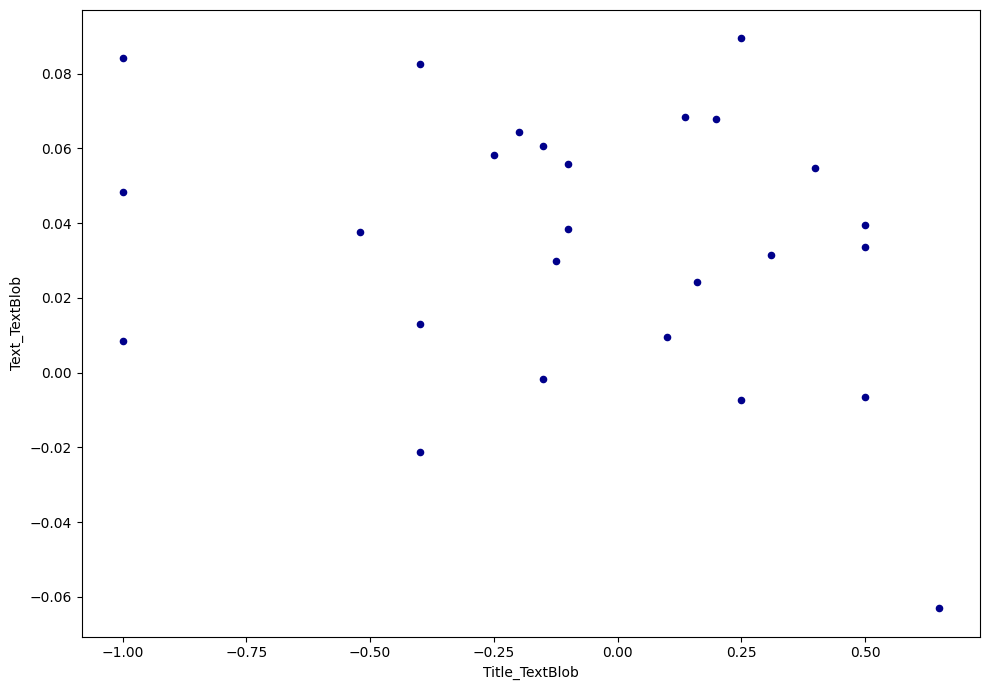

In [116]:
ax1 = title_analysis_df.plot.scatter(x='Title_TextBlob',
                       y='Text_TextBlob',
                       c='DarkBlue')

There seems to be no correlation between the sentiment score of the chapter title and the sentiment of the chapter text.

## What is the sentiment of the description of characters in the list? What is the sentiment of the characters as mentioned throughout the books? Do the sentiments match?

In [117]:
# reference_name will be used to find where characters are mentioned since they are not usually refered to by their full name
# reference_name is a list of first and last name, except for the Weasley's
characters_df = pd.read_csv("characters_list.csv",encoding="latin-1")
characters_df["reference_name"] = [s.split()[0] if "Weasley" in characters_df["name"] else s.split() for s in characters_df["name"]]

# manually update some of the other characters
characters_df.loc[characters_df['name'] == "Vincent Crabbe Sr.", 'reference_name'] = ["Crabbe"]
characters_df.loc[characters_df['name'] == "Sirius Black", 'reference_name'] = "Sirius"
characters_df.loc[characters_df['name'] == "Regulus Arcturus Black", 'reference_name'] = ["Regulus"]
characters_df.loc[characters_df['name'] == "Alberforth Dumbledore", 'reference_name'] = ["Aberforth"]
characters_df.loc[characters_df['name'] == "Petunia Dursley", 'reference_name'] = ["Petunia"]
characters_df.loc[characters_df['name'] == "Vernon Dursley", 'reference_name'] = ["Vernon"]
characters_df.loc[characters_df['name'] == "Dudley Dursley", 'reference_name'] = ["Dudley"]
characters_df.loc[characters_df['name'] == "James Potter", 'reference_name'] = ["James"]
characters_df.loc[characters_df['name'] == "Lily Potter", 'reference_name'] = ["Lily"]

characters_df

,id,name,bio,reference_name
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...,Regulus
1,1,Sirius Black,Best friend of James Potter and godfather of H...,Sirius
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...,"[Lavender, Brown]"
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...,"[Cho, Chang]"
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...,Crabbe
...,...,...,...,...
60,60,Fluffy,Three-headed dog belonging to Rubeus Hagrid.,[Fluffy]
61,61,Hedwig,Harry's owl.,[Hedwig]
62,62,Moaning Myrtle,Ghost at Hogwards.,"[Moaning, Myrtle]"
63,63,Aragog,Acromantula belonging to Rubeus Hagrid.,[Aragog]


In [118]:
# There are 24 characters that have a non-zero bio sentiment score
characters_df["TextBlob"]=[TextBlob(s).sentiment.polarity for s in characters_df.bio]
print(len(characters_df[characters_df.TextBlob != 0]))

character_analysis_df = characters_df[characters_df.TextBlob != 0].copy()
character_analysis_df

24


,id,name,bio,reference_name,TextBlob
1,1,Sirius Black,Best friend of James Potter and godfather of H...,Sirius,1.000000
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...,"[Lavender, Brown]",-0.200000
5,5,Vincent Crabbe,Slytherin student who was best friends with Go...,"[Vincent, Crabbe]",1.000000
6,6,"Bartemius ""Barty"" Crouch Sr.",Head of the department of Internation Magical ...,"[Bartemius, ""Barty"", Crouch, Sr.]",0.150000
8,8,Fleur Delacour,Participated in the Triwizard tournament and m...,"[Fleur, Delacour]",0.250000
9,9,Cedric Diggory,Participated in the Triwizard tournament and g...,"[Cedric, Diggory]",-0.200000
11,11,Albus Dumbledore,Headmaster of Hogwards killed by Snape.,"[Albus, Dumbledore]",-0.200000
18,18,Cornelius Fudge,Minister of Magic that was forced to resign.,"[Cornelius, Fudge]",0.100000
20,20,Gregory Goyle,Best friend of Crabbe. Slytherin student and d...,"[Gregory, Goyle]",1.000000
21,21,Hermione Granger,One of Harry's best friend and marries Ron Wea...,"[Hermione, Granger]",1.000000


In [119]:
# Find all sentences that contain the character's name
character_analysis_df["Sentences"] = ""

for text_index, text_row in dfall.iterrows():
    sentences_temp = tokenize.sent_tokenize(text_row["Text"])
    for sent in sentences_temp:
        for char_index, char_row in character_analysis_df.iterrows():
            if  isinstance(char_row["reference_name"], str):
                if char_row["reference_name"] in sent:
                    character_analysis_df.loc[char_index, ['Sentences']] = char_row["Sentences"] + sent
            else:
                if any(x in sent for x in char_row["reference_name"]):
                    character_analysis_df.loc[char_index, ['Sentences']] = char_row["Sentences"] + sent
character_analysis_df

,id,name,bio,reference_name,TextBlob,Sentences
1,1,Sirius Black,Best friend of James Potter and godfather of H...,Sirius,1.000000,“Young Sirius Black lent it to me.“Sirius Blac...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...,"[Lavender, Brown]",-0.200000,A plump woman outside an Apothecary was shaki...
5,5,Vincent Crabbe,Slytherin student who was best friends with Go...,"[Vincent, Crabbe]",1.000000,"“Oh, this is Crabbe and this is Goyle,” said t..."
6,6,"Bartemius ""Barty"" Crouch Sr.",Head of the department of Internation Magical ...,"[Bartemius, ""Barty"", Crouch, Sr.]",0.150000,"Crouching behind the one-eyed witch, he smooth..."
8,8,Fleur Delacour,Participated in the Triwizard tournament and m...,"[Fleur, Delacour]",0.250000,"“The champion for Beauxbatons,” said Dumbledor..."
9,9,Cedric Diggory,Participated in the Triwizard tournament and g...,"[Cedric, Diggory]",-0.200000,“And we’ve been practicing all those moves as...
11,11,Albus Dumbledore,Headmaster of Hogwards killed by Snape.,"[Albus, Dumbledore]",-0.200000,This man’s name was Albus Dumbledore.Dumbledo...
18,18,Cornelius Fudge,Minister of Magic that was forced to resign.,"[Cornelius, Fudge]",0.100000,"“They wanted Dumbledore fer Minister, o’ cour..."
20,20,Gregory Goyle,Best friend of Crabbe. Slytherin student and d...,"[Gregory, Goyle]",1.000000,"“Oh, this is Crabbe and this is Goyle,” said t..."
21,21,Hermione Granger,One of Harry's best friend and marries Ron Wea...,"[Hermione, Granger]",1.000000,"Nobody in my family’s magic at all, it was ev..."


In [120]:
character_analysis_df["Text_Sent_Score"] = np.nan
for index, row in character_analysis_df.iterrows():
    sentences_temp = tokenize.sent_tokenize(row["Sentences"])
    average_TextBlob_score = mean([TextBlob(s).sentiment.polarity for s in sentences_temp])
    character_analysis_df.loc[index, ['Text_Sent_Score']] = average_TextBlob_score
character_analysis_df

,id,name,bio,reference_name,TextBlob,Sentences,Text_Sent_Score
1,1,Sirius Black,Best friend of James Potter and godfather of H...,Sirius,1.000000,“Young Sirius Black lent it to me.“Sirius Blac...,0.047749
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...,"[Lavender, Brown]",-0.200000,A plump woman outside an Apothecary was shaki...,0.053497
5,5,Vincent Crabbe,Slytherin student who was best friends with Go...,"[Vincent, Crabbe]",1.000000,"“Oh, this is Crabbe and this is Goyle,” said t...",0.030056
6,6,"Bartemius ""Barty"" Crouch Sr.",Head of the department of Internation Magical ...,"[Bartemius, ""Barty"", Crouch, Sr.]",0.150000,"Crouching behind the one-eyed witch, he smooth...",0.122124
8,8,Fleur Delacour,Participated in the Triwizard tournament and m...,"[Fleur, Delacour]",0.250000,"“The champion for Beauxbatons,” said Dumbledor...",0.091716
9,9,Cedric Diggory,Participated in the Triwizard tournament and g...,"[Cedric, Diggory]",-0.200000,“And we’ve been practicing all those moves as...,0.092160
11,11,Albus Dumbledore,Headmaster of Hogwards killed by Snape.,"[Albus, Dumbledore]",-0.200000,This man’s name was Albus Dumbledore.Dumbledo...,0.080932
18,18,Cornelius Fudge,Minister of Magic that was forced to resign.,"[Cornelius, Fudge]",0.100000,"“They wanted Dumbledore fer Minister, o’ cour...",0.062610
20,20,Gregory Goyle,Best friend of Crabbe. Slytherin student and d...,"[Gregory, Goyle]",1.000000,"“Oh, this is Crabbe and this is Goyle,” said t...",0.048008
21,21,Hermione Granger,One of Harry's best friend and marries Ron Wea...,"[Hermione, Granger]",1.000000,"Nobody in my family’s magic at all, it was ev...",0.062696


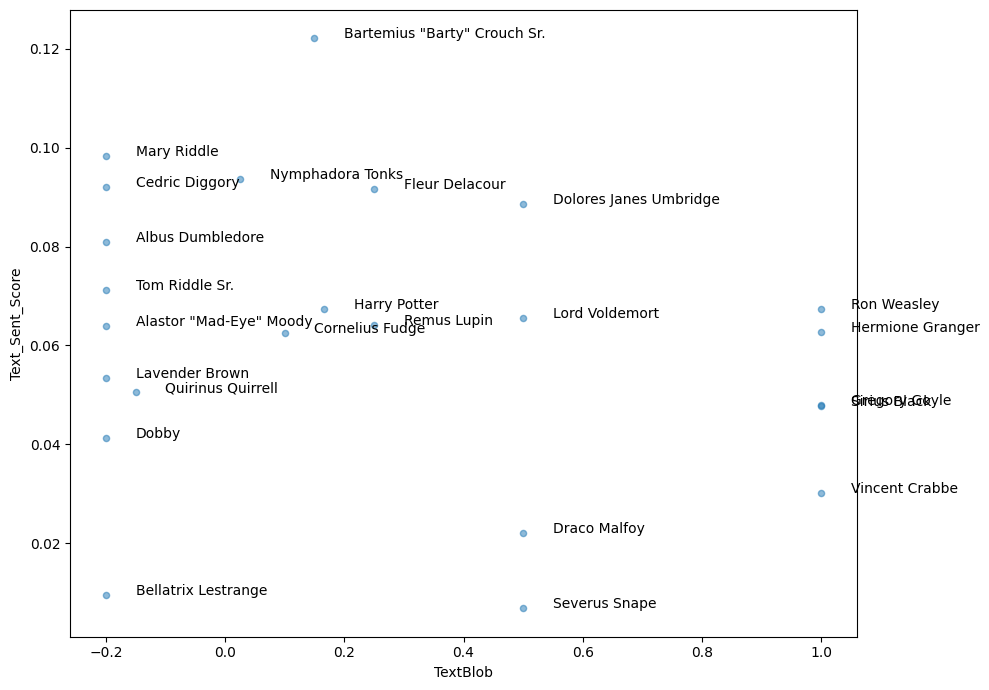

In [121]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

# Scatter plot
ax = character_analysis_df.plot.scatter(x='TextBlob', y='Text_Sent_Score', alpha=0.5)

# Annotate each data point
for i, txt in enumerate(character_analysis_df.name):
   ax.annotate(txt, (character_analysis_df.TextBlob.iat[i]+0.05, character_analysis_df.Text_Sent_Score.iat[i]))

plt.show()

## How does the sentiment change throughout the books?

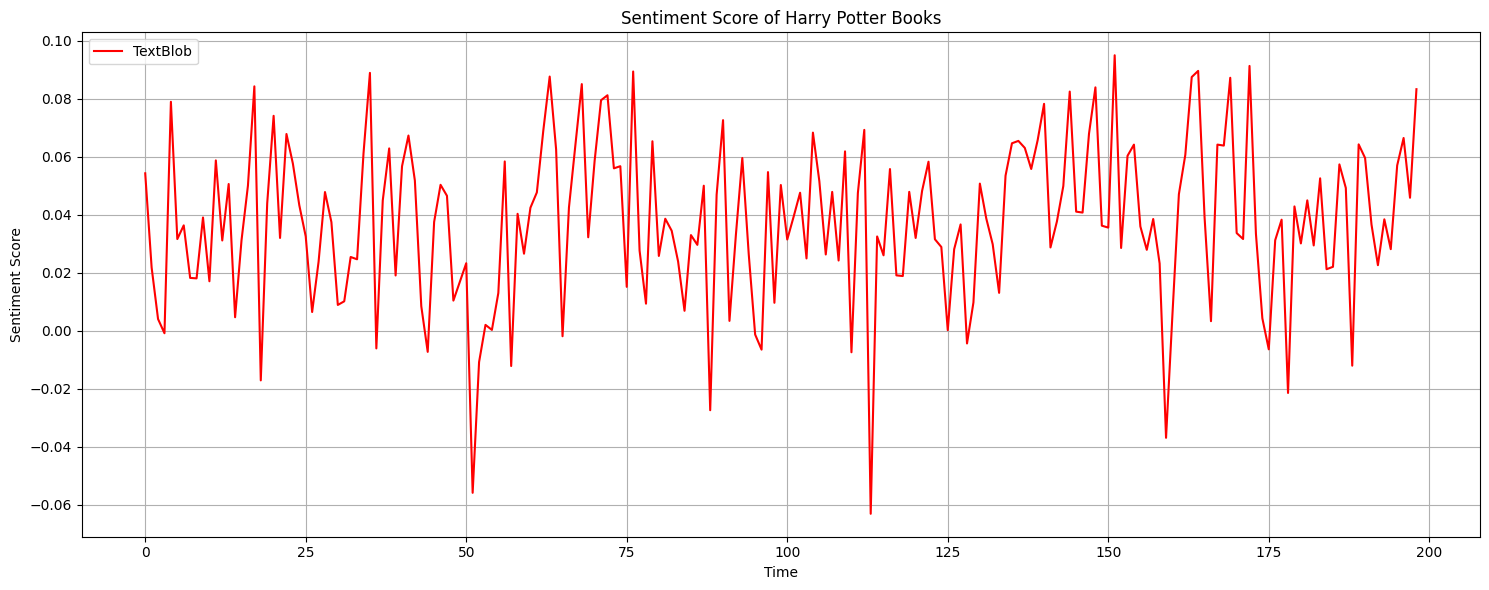

In [122]:
# Sentiment over all chapters throughout the books
plt.figure(figsize=(15, 6))
plt.plot(dfall.index, dfall.Text_TextBlob, "-r", label="TextBlob")
plt.legend(loc="upper left")
plt.title("Sentiment Score of Harry Potter Books")
plt.xlabel("Time")
plt.ylabel("Sentiment Score")
plt.grid(axis='both')
plt.show()

In [123]:
# Sentiment over chapters within the individual books
dfall_sentanalysis = dfall.copy()

dfall_sentanalysis["Chaper_Number"] = np.NaN
book_titles = []
chapter = 1

for index, row in dfall_sentanalysis.iterrows():
    if row["Book"] not in book_titles:
        book_titles.append(row["Book"])
        chapter = 1
    dfall_sentanalysis.loc[index, ['Chaper_Number']] = chapter
    chapter += 1

Book
Book 1: Harry Potter and the Philosophers Stone      AxesSubplot(0.125,0.11;0.775x0.77)
Book 2: Harry Potter and the Chamber of Secrets      AxesSubplot(0.125,0.11;0.775x0.77)
Book 3: Harry Potter and the Prisoner of Azkaban     AxesSubplot(0.125,0.11;0.775x0.77)
Book 4: Harry Potter and the Goblet of Fire          AxesSubplot(0.125,0.11;0.775x0.77)
Book 5: Harry Potter and the Order of the Phoenix    AxesSubplot(0.125,0.11;0.775x0.77)
Book 6: Harry Potter and the Half Blood Prince       AxesSubplot(0.125,0.11;0.775x0.77)
Book 7: Harry Potter and the Deathly Hallows         AxesSubplot(0.125,0.11;0.775x0.77)
Name: Text_TextBlob, dtype: object

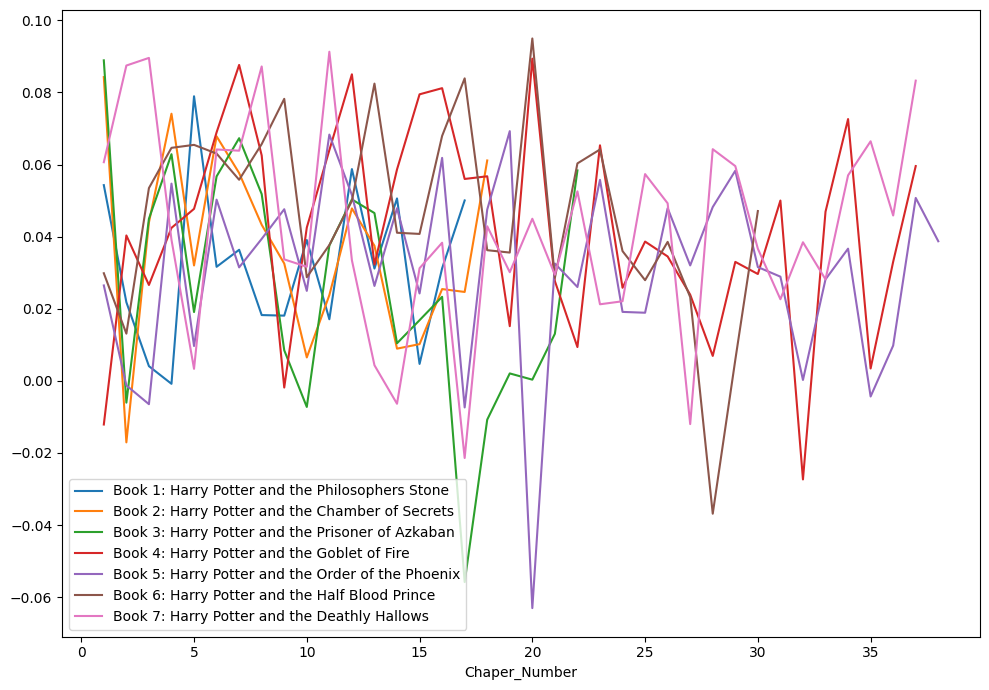

In [124]:
#define index column
dfall_sentanalysis.set_index('Chaper_Number', inplace=True)

#group data by product and display sales as line chart
dfall_sentanalysis.groupby('Book')['Text_TextBlob'].plot(legend=True)

array([<AxesSubplot:xlabel='Chaper_Number'>,
       <AxesSubplot:xlabel='Chaper_Number'>,
       <AxesSubplot:xlabel='Chaper_Number'>,
       <AxesSubplot:xlabel='Chaper_Number'>,
       <AxesSubplot:xlabel='Chaper_Number'>,
       <AxesSubplot:xlabel='Chaper_Number'>,
       <AxesSubplot:xlabel='Chaper_Number'>], dtype=object)

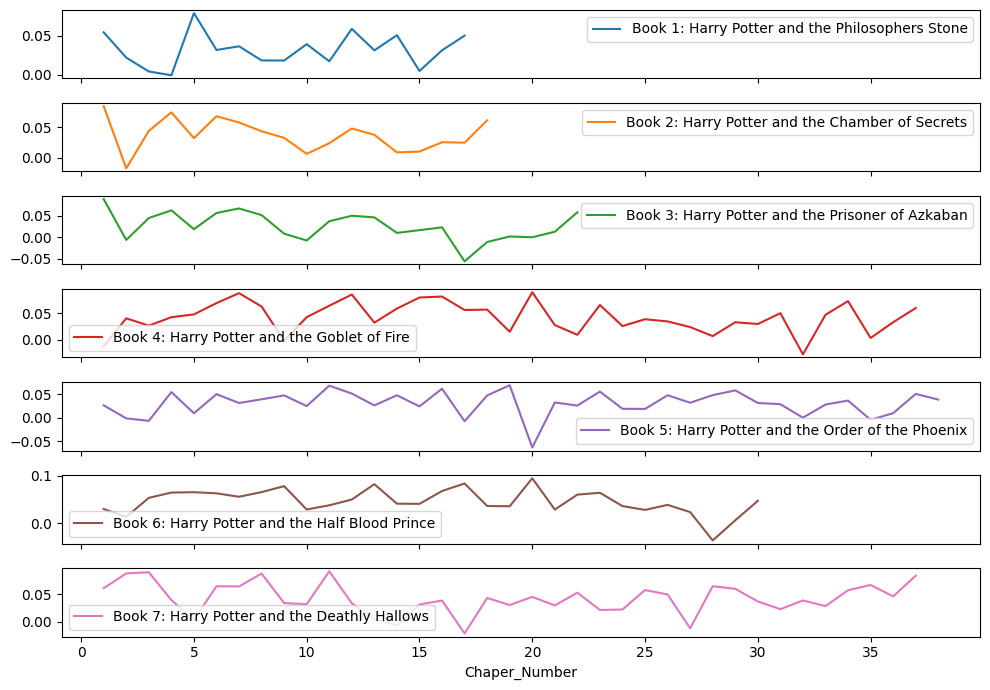

In [125]:
pd.pivot_table(dfall_sentanalysis.reset_index(),
               index='Chaper_Number', columns='Book', values='Text_TextBlob'
              ).plot(subplots=True)

## Text Visualization

### Frequency Bar Chart Across Books

In [126]:
# using vectorizer7, TFIDF bigrams with stop words removed, no stemming, without characters' names¶
# tv_DTM = vectorizer7.fit_transform(df[df.Company=="Capital One"]["Consumer.complaint.narrative"])

NameError: name 'df' is not defined